In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

<h3> Logistic Regression - Original Dataset without Outliers Normalized<h3>

In [2]:
df_no_outliers_normalized = pd.read_csv('../Final_Data_Set/Original Dataset without Outliers Normalized.csv')

In [3]:
X = df_no_outliers_normalized.drop(columns=['diabetes'])
y = df_no_outliers_normalized['diabetes']

X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded
0,1.713008,0,1,-0.286437,1.134061,0.126046,-0.633042,-0.841116
1,0.560337,0,0,0.072849,1.134061,-1.523079,-0.633042,-0.841116
2,-0.592335,0,0,0.072849,0.232946,0.620784,-0.633042,1.188683
3,-0.237667,0,0,-0.579938,-0.467921,0.538328,1.579675,-0.841116
4,1.535674,1,1,-1.138266,-0.668169,0.538328,1.579675,1.188683
...,...,...,...,...,...,...,...,...
96303,1.713008,0,0,0.072849,0.733566,-1.248225,-0.633042,-0.841116
96304,-1.745006,0,0,-1.605507,1.033937,-0.973371,-0.633042,-0.841116
96305,1.092339,0,0,0.158875,0.232946,0.538328,1.579675,1.188683
96306,-0.769669,0,0,1.439149,-1.469161,-0.973371,-0.633042,-0.841116


In [4]:
# split dataset to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
#Initialize SMOTE
smote = SMOTE(random_state = 42)

# Apply SMOTE to the training dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [6]:
# Fit into a Logistic Regression model
lr = LogisticRegression(random_state = 42, max_iter = 1000)
lr.fit(X_train_resampled, y_train_resampled)

lr_pred = lr.predict(X_test)

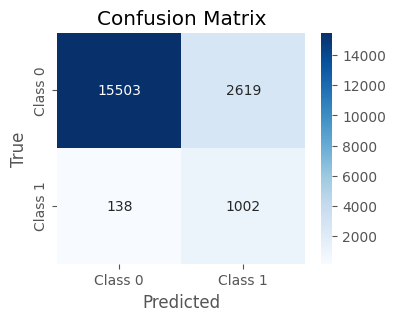

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, lr_pred)

# Heatmap of Confusion Matrix
class_labels = ["Class 0", "Class 1"]
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [8]:
# Performance Evaluation 
print('Accuracy:')
accuracy = accuracy_score(y_test, lr_pred)
print(accuracy)

print('\nPrecision:')
precision = precision_score(y_test, lr_pred)
print(precision)

print('\nRecall:')
recall = recall_score(y_test, lr_pred)
print(recall)

print('\nF1 score:')
f1 = f1_score(y_test, lr_pred) 
print(f1)

print('\nROC AUC score:')
roc_auc = roc_auc_score(y_test, lr_pred)
print(roc_auc)

Accuracy:
0.8568684456442737

Precision:
0.2767191383595692

Recall:
0.8789473684210526

F1 score:
0.4209199747952111

ROC AUC score:
0.8672134480335039


In [9]:
train_accuracy = accuracy_score(y_train_resampled, lr.predict(X_train_resampled))
print('Training Accuracy: ' + str(train_accuracy))

# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits = 15, random_state = 42, shuffle = True)

cv_lr = cross_val_score(estimator = lr, X = X_train_resampled, y = y_train_resampled, cv = kfold, scoring='accuracy')
cv_accuracy = cv_lr.mean()
print('Cross Validation Accuracy: ' + str(cv_accuracy))

Training Accuracy: 0.8683643892339544


Cross Validation Accuracy: 0.8682884748102139


In [10]:
# Predictions
pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred}) \
    .sample(10)

,Actual,Predicted
64159,0,0
21290,1,0
28311,0,0
71440,0,0
58205,0,0
68400,0,0
40885,0,0
53217,0,0
66762,0,0
60095,0,1


In [11]:
results = pd.DataFrame([['Without outliers, Normalized data', train_accuracy, accuracy, cv_accuracy, precision, recall, f1, roc_auc]], 
                       columns = ['Logistic Regression Model', 'Training Accuracy', 'Testing Accuracy', 'CV Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])

summary = results
summary

,Logistic Regression Model,Training Accuracy,Testing Accuracy,CV Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,"Without outliers, Normalized data",0.868364,0.856868,0.868288,0.276719,0.878947,0.42092,0.867213


<h3> Logistic Regression - Original Dataset with Outliers Included Normalized<h3>

In [12]:
df_with_outliers_normalized = pd.read_csv('../Final_Data_Set/Original Dataset with Outliers Included Normalized.csv')

In [13]:
X = df_with_outliers_normalized.drop(columns=['diabetes'])
y = df_with_outliers_normalized['diabetes']

X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded
0,1.692577,0,1,-0.321051,1.001692,0.047709,-0.640425,-0.841175
1,0.537899,0,0,-0.000114,1.001692,-1.426157,-0.640425,-0.841175
2,-0.616779,0,0,-0.000114,0.161089,0.489869,-0.640425,1.188813
3,-0.261494,0,0,-0.583225,-0.492714,0.416175,1.561464,-0.841175
4,1.514935,1,1,-1.081957,-0.679515,0.416175,1.561464,1.188813
...,...,...,...,...,...,...,...,...
99977,1.692577,0,0,-0.000114,0.628091,-1.180513,-0.640425,-0.841175
99978,-1.771458,0,0,-1.499326,0.908292,-0.934869,-0.640425,-0.841175
99979,1.070828,0,0,0.076730,0.161089,0.416175,1.561464,1.188813
99980,-0.794422,0,0,1.220350,-1.426718,-0.934869,-0.640425,-0.841175


In [14]:
# split dataset to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
#Initialize SMOTE
smote = SMOTE(random_state = 42)

# Apply SMOTE to the training dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [16]:
# Fit into a Logistic Regression model
lr = LogisticRegression(random_state = 42, max_iter = 1000)
lr.fit(X_train_resampled, y_train_resampled)

lr_pred = lr.predict(X_test)

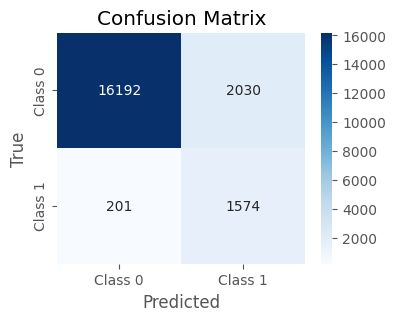

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, lr_pred)

# Heatmap of Confusion Matrix
class_labels = ["Class 0", "Class 1"]
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [18]:
# Performance Evaluation 
print('Accuracy:')
accuracy = accuracy_score(y_test, lr_pred)
print(accuracy)

print('\nPrecision:')
precision = precision_score(y_test, lr_pred)
print(precision)

print('\nRecall:')
recall = recall_score(y_test, lr_pred)
print(recall)

print('\nF1 score:')
f1 = f1_score(y_test, lr_pred) 
print(f1)

print('\nROC AUC score:')
roc_auc = roc_auc_score(y_test, lr_pred)
print(roc_auc)

Accuracy:
0.8884332649897485

Precision:
0.4367369589345172

Recall:
0.8867605633802816

F1 score:
0.5852388919873582

ROC AUC score:
0.8876783828864969


In [19]:
train_accuracy = accuracy_score(y_train_resampled, lr.predict(X_train_resampled))
print('Training Accuracy: ' + str(train_accuracy))

# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits = 15, random_state = 42, shuffle = True)

cv_lr = cross_val_score(estimator = lr, X = X_train_resampled, y = y_train_resampled, cv = kfold, scoring='accuracy')
cv_accuracy = cv_lr.mean()
print('Cross Validation Accuracy: ' + str(cv_accuracy))

Training Accuracy: 0.883995358995359


Cross Validation Accuracy: 0.883988533988534


In [20]:
# Predictions
pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred}) \
    .sample(10)

,Actual,Predicted
45795,0,1
99457,0,0
71523,0,0
41647,1,0
58657,0,0
66489,0,0
3716,0,0
81979,0,0
19474,0,0
27720,0,0


In [21]:
results = pd.DataFrame([['With outliers, Normalized data', train_accuracy, accuracy, cv_accuracy, precision, recall, f1, roc_auc]], 
                       columns = ['Logistic Regression Model', 'Training Accuracy', 'Testing Accuracy', 'CV Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])

summary = pd.concat([summary, results], ignore_index=True)
summary

,Logistic Regression Model,Training Accuracy,Testing Accuracy,CV Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,"Without outliers, Normalized data",0.868364,0.856868,0.868288,0.276719,0.878947,0.420920,0.867213
1,"With outliers, Normalized data",0.883995,0.888433,0.883989,0.436737,0.886761,0.585239,0.887678


<h3> Logistic Regression - Original Dataset without Outliers<h3>

In [22]:
df_no_outliers = pd.read_csv('../Final_Data_Set/Original Dataset without Outliers.csv')

In [23]:
X = df_no_outliers.drop(columns=['diabetes'])
y = df_no_outliers['diabetes']

X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded
0,80.0,0,1,25.19,6.6,140,-0.247356,-0.128959
1,54.0,0,0,27.32,6.6,80,-0.247356,-0.128959
2,28.0,0,0,27.32,5.7,158,-0.247356,0.160772
3,36.0,0,0,23.45,5.0,155,0.452953,-0.128959
4,76.0,1,1,20.14,4.8,155,0.452953,0.160772
...,...,...,...,...,...,...,...,...
96303,80.0,0,0,27.32,6.2,90,-0.247356,-0.128959
96304,2.0,0,0,17.37,6.5,100,-0.247356,-0.128959
96305,66.0,0,0,27.83,5.7,155,0.452953,0.160772
96306,24.0,0,0,35.42,4.0,100,-0.247356,-0.128959


In [24]:
# split dataset to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
#Initialize SMOTE
smote = SMOTE(random_state = 42)

# Apply SMOTE to the training dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [26]:
# Fit into a Logistic Regression model
lr = LogisticRegression(random_state = 42, max_iter = 1000)
lr.fit(X_train_resampled, y_train_resampled)

lr_pred = lr.predict(X_test)

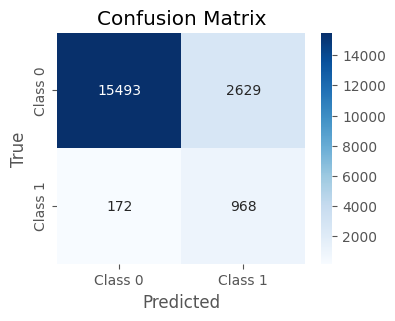

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, lr_pred)

# Heatmap of Confusion Matrix
class_labels = ["Class 0", "Class 1"]
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [28]:
# Performance Evaluation 
print('Accuracy:')
accuracy = accuracy_score(y_test, lr_pred)
print(accuracy)

print('\nPrecision:')
precision = precision_score(y_test, lr_pred)
print(precision)

print('\nRecall:')
recall = recall_score(y_test, lr_pred)
print(recall)

print('\nF1 score:')
f1 = f1_score(y_test, lr_pred) 
print(f1)

print('\nROC AUC score:')
roc_auc = roc_auc_score(y_test, lr_pred)
print(roc_auc)

Accuracy:
0.8545841553317413

Precision:
0.2691131498470948

Recall:
0.8491228070175438

F1 score:
0.4086974878615157

ROC AUC score:
0.8520252595952966


In [29]:
train_accuracy = accuracy_score(y_train_resampled, lr.predict(X_train_resampled))
print('Training Accuracy: ' + str(train_accuracy))

# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits = 15, random_state = 42, shuffle = True)

cv_lr = cross_val_score(estimator = lr, X = X_train_resampled, y = y_train_resampled, cv = kfold, scoring='accuracy')
cv_accuracy = cv_lr.mean()
print('Cross Validation Accuracy: ' + str(cv_accuracy))

Training Accuracy: 0.8701104209799861


Cross Validation Accuracy: 0.870144927536232


In [30]:
# Predictions
pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred}) \
    .sample(10)

,Actual,Predicted
54317,0,0
65760,0,0
47973,0,0
76656,0,1
32565,0,0
2685,0,0
72678,1,0
10307,1,1
88438,0,1
1197,0,0


In [31]:
results = pd.DataFrame([['Without outliers, Non-normalized data', train_accuracy, accuracy, cv_accuracy, precision, recall, f1, roc_auc]], 
                       columns = ['Logistic Regression Model', 'Training Accuracy', 'Testing Accuracy', 'CV Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])

summary = pd.concat([summary, results], ignore_index=True)
summary

,Logistic Regression Model,Training Accuracy,Testing Accuracy,CV Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,"Without outliers, Normalized data",0.868364,0.856868,0.868288,0.276719,0.878947,0.420920,0.867213
1,"With outliers, Normalized data",0.883995,0.888433,0.883989,0.436737,0.886761,0.585239,0.887678
2,"Without outliers, Non-normalized data",0.870110,0.854584,0.870145,0.269113,0.849123,0.408697,0.852025


<h3> Logistic Regression - Original Dataset with Outliers Included<h3>

In [32]:
df_with_outliers = pd.read_csv('../Final_Data_Set/Original Dataset with Outliers Included.csv')

In [33]:
X = df_with_outliers.drop(columns=['diabetes'])
y = df_with_outliers['diabetes']

X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded
0,80.0,0,1,25.19,6.6,140,-0.246527,-0.119227
1,54.0,0,0,27.32,6.6,80,-0.246527,-0.119227
2,28.0,0,0,27.32,5.7,158,-0.246527,0.150651
3,36.0,0,0,23.45,5.0,155,0.450465,-0.119227
4,76.0,1,1,20.14,4.8,155,0.450465,0.150651
...,...,...,...,...,...,...,...,...
99977,80.0,0,0,27.32,6.2,90,-0.246527,-0.119227
99978,2.0,0,0,17.37,6.5,100,-0.246527,-0.119227
99979,66.0,0,0,27.83,5.7,155,0.450465,0.150651
99980,24.0,0,0,35.42,4.0,100,-0.246527,-0.119227


In [34]:
# split dataset to training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
#Initialize SMOTE
smote = SMOTE(random_state = 42)

# Apply SMOTE to the training dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [36]:
# Fit into a Logistic Regression model
lr = LogisticRegression(random_state = 42, max_iter = 1000)
lr.fit(X_train_resampled, y_train_resampled)

lr_pred = lr.predict(X_test)

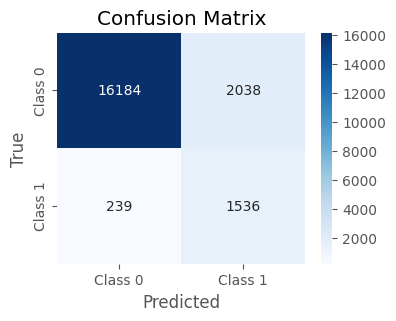

In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, lr_pred)

# Heatmap of Confusion Matrix
class_labels = ["Class 0", "Class 1"]
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [38]:
# Performance Evaluation 
print('Accuracy:')
accuracy = accuracy_score(y_test, lr_pred)
print(accuracy)

print('\nPrecision:')
precision = precision_score(y_test, lr_pred)
print(precision)

print('\nRecall:')
recall = recall_score(y_test, lr_pred)
print(recall)

print('\nF1 score:')
f1 = f1_score(y_test, lr_pred) 
print(f1)

print('\nROC AUC score:')
roc_auc = roc_auc_score(y_test, lr_pred)
print(roc_auc)

Accuracy:
0.8861329199379907

Precision:
0.429770565193061

Recall:
0.8653521126760564

F1 score:
0.5743129556926528

ROC AUC score:
0.8767546426622517


In [39]:
train_accuracy = accuracy_score(y_train_resampled, lr.predict(X_train_resampled))
print('Training Accuracy: ' + str(train_accuracy))

# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits = 15, random_state = 42, shuffle = True)

cv_lr = cross_val_score(estimator = lr, X = X_train_resampled, y = y_train_resampled, cv = kfold, scoring='accuracy')
cv_accuracy = cv_lr.mean()
print('Cross Validation Accuracy: ' + str(cv_accuracy))

Training Accuracy: 0.886042861042861


Cross Validation Accuracy: 0.885988260988261


In [40]:
# Predictions 
pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred}) \
    .sample(10)

,Actual,Predicted
124,0,0
25330,0,0
73262,0,0
5688,0,0
81544,0,0
42943,0,0
85260,0,1
29091,0,1
88257,0,1
69567,0,0


In [41]:
results = pd.DataFrame([['With outliers, Non-normalized data', train_accuracy, accuracy, cv_accuracy, precision, recall, f1, roc_auc]], 
                       columns = ['Logistic Regression Model', 'Training Accuracy', 'Testing Accuracy', 'CV Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'])

summary = pd.concat([summary, results], ignore_index=True)
summary

,Logistic Regression Model,Training Accuracy,Testing Accuracy,CV Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,"Without outliers, Normalized data",0.868364,0.856868,0.868288,0.276719,0.878947,0.420920,0.867213
1,"With outliers, Normalized data",0.883995,0.888433,0.883989,0.436737,0.886761,0.585239,0.887678
2,"Without outliers, Non-normalized data",0.870110,0.854584,0.870145,0.269113,0.849123,0.408697,0.852025
3,"With outliers, Non-normalized data",0.886043,0.886133,0.885988,0.429771,0.865352,0.574313,0.876755
